In [1]:
from __future__ import annotations
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from typing import Literal

In [2]:
import os
import re
from glob import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import emoji

In [3]:
path_to_datasets = "{}\\datasets".format(os.getcwd())
all_datasets = (pd.read_csv(f) for f in glob(os.path.join(path_to_datasets, "*.csv")))

# data = pd.read_csv('./datasets/dataset_jembatan_penyebrangan_pulau_kumala.csv')
data = pd.concat(all_datasets, ignore_index=True)

In [4]:
def remove_empty_review (review: str) -> str:
    return None if review == "[no_review]" else review

In [5]:
data['review'] = data['review'].apply(remove_empty_review)
data = data.dropna(subset=['review'])
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value
0,Fachrul Rozie F,"OK, I have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5
1,Fachrul Rozie F,The place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5
2,Teras,A unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5
3,baim Journey,One of the tourist destinations on Kumala Isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5
4,Gustian Garang,"Amazing... As a Dayak person, I am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5


In [6]:
def remove_urls (text: str):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def convert_emojis (text: str):
    return emoji.demojize(text)

def label_data (star: int) -> Literal['positive', 'negative', 'neutral']:
    if star >= 4:
        return 'positive'
    elif star == 3:
        return 'neutral'
    else:
        return 'negative'

In [7]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the sentiment pipeline to the 'review' column
data['bert_sentiment'] = data['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Display the dataframe with the new 'bert_sentiment' column
data[['review', 'bert_sentiment']]

d:\suarasiy\skripsi\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,review,bert_sentiment
0,"OK, I have it",POSITIVE
1,The place is good for taking photos,POSITIVE
2,A unique and interesting island located in the...,POSITIVE
3,One of the tourist destinations on Kumala Isla...,POSITIVE
4,"Amazing... As a Dayak person, I am very proud ...",POSITIVE
...,...,...
577,"Tenggarong, East Kalimantan",POSITIVE
609,Excellent,POSITIVE
638,The place is not well maintained. There are lo...,NEGATIVE
639,The tower is good for children's play faciliti...,NEGATIVE


In [8]:
# remove urls
data['review'] = data['review'].apply(remove_urls)
# convert emojis
data['review'] = data['review'].apply(convert_emojis)
# case folding
data['review'] = data['review'].apply(lambda x: x.lower())
# labelling data
data['sentiment'] = data['stars.value'].apply(label_data)

In [9]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment
0,Fachrul Rozie F,"ok, i have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
1,Fachrul Rozie F,the place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
2,Teras,a unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
3,baim Journey,one of the tourist destinations on kumala isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive
4,Gustian Garang,"amazing... as a dayak person, i am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive
...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"tenggarong, east kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
609,Yasman ARDI,excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive
638,Masyhurun Fiinaa,the place is not well maintained. there are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,NEGATIVE,negative
639,Irfan Yourdani,the tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,NEGATIVE,positive


In [10]:
from transformers import BertTokenizer, BertModel

In [11]:
# tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# text = "Hello, how are you? 🙂"

# tokens = tokenizer.tokenize(text)
# print("Tokens:", tokens)

# input_ids = tokenizer.convert_tokens_to_ids(tokens)
# print("Input IDs:", input_ids)

d:\suarasiy\skripsi\env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\busin\.cache\huggingface\hub\models--indobenchmark--indobert-base-p1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Tokens: ['hello', ',', 'how', 'are', 'you', '?', '[UNK]']
Input IDs: [7592, 1010, 2129, 2024, 2017, 1029, 100]


In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [12]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [13]:
# Tokenize the text using the BERT tokenizer
# Define a function to preprocess the text using BERT tokenizer
def preprocess_bert_tokenization(text, tokenizer, max_length=128):
    tokens = tokenizer.tokenize(text)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    # Pad or truncate the input_ids to max_length
    if len(input_ids) < max_length:
        input_ids += [tokenizer.pad_token_id] * (max_length - len(input_ids))
    else:
        input_ids = input_ids[:max_length]
    return input_ids

# Apply the preprocessing function to the 'review' column
data['input_ids'] = data['review'].apply(lambda x: preprocess_bert_tokenization(x, tokenizer))

# Display the dataframe with the new 'input_ids' column
data[['review', 'input_ids']]

,review,input_ids
0,"ok, i have it","[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,the place is good for taking photos,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,a unique and interesting island located in the...,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,one of the tourist destinations on kumala isla...,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,"amazing... as a dayak person, i am very proud ...","[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."
...,...,...
577,"tenggarong, east kalimantan","[2702, 23033, 17583, 1010, 2264, 19924, 2386, ..."
609,excellent,"[6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
638,the place is not well maintained. there are lo...,"[1996, 2173, 2003, 2025, 2092, 5224, 1012, 204..."
639,the tower is good for children's play faciliti...,"[1996, 3578, 2003, 2204, 2005, 2336, 1005, 105..."


In [14]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment,input_ids
0,Fachrul Rozie F,"ok, i have it",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,Fachrul Rozie F,the place is good for taking photos,Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,Teras,a unique and interesting island located in the...,"Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,baim Journey,one of the tourist destinations on kumala isla...,Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,Gustian Garang,"amazing... as a dayak person, i am very proud ...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."
...,...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"tenggarong, east kalimantan",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[2702, 23033, 17583, 1010, 2264, 19924, 2386, ..."
609,Yasman ARDI,excellent,Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
638,Masyhurun Fiinaa,the place is not well maintained. there are lo...,Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,NEGATIVE,negative,"[1996, 2173, 2003, 2025, 2092, 5224, 1012, 204..."
639,Irfan Yourdani,the tower is good for children's play faciliti...,"Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,NEGATIVE,positive,"[1996, 3578, 2003, 2204, 2005, 2336, 1005, 105..."


In [15]:
import torch

In [16]:
def extract_features (review: str):
    # Tokenize the review
    inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get the hidden states from the BERT model
    with torch.no_grad():
        outputs = model(**inputs)

    # The last hidden state is the output of the model
    last_hidden_state = outputs.last_hidden_state

    # Use the [CLS] token embedding as the sentence embedding
    cls_embedding = last_hidden_state[:, 0, :].squeeze().numpy()

    return cls_embedding

# Apply the feature extraction to the 'review' column
data['review'] = data['review'].apply(extract_features)

# Display the first few rows with the extracted features
data.head()
    



,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment,input_ids
0,Fachrul Rozie F,"[-0.18781453, 0.15712726, 0.2112856, -0.193930...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,Fachrul Rozie F,"[0.13413121, 0.13372079, 0.13411452, -0.041422...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,Teras,"[-0.603967, -0.19823349, -0.22585413, -0.22799...","Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,baim Journey,"[-0.7103056, 0.103414916, -0.11037938, -0.3888...",Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,Gustian Garang,"[0.1241154, 0.29901516, -0.07769714, -0.609486...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:

# convert the BERT features to a list of arrays
features = np.array(data['review'].tolist())

# split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features, data['bert_sentiment'], test_size=.3, random_state=42)

# display the shapes of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training features shape: (347, 768)
Testing features shape: (149, 768)
Training labels shape: (347,)
Testing labels shape: (149,)


In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC, LinearSVC, LinearSVR, NuSVC, NuSVR, SVR

In [25]:
# Initialize the Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.785234899328859
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.33      0.06      0.10        18
    positive       0.79      0.98      0.88       118

    accuracy                           0.79       149
   macro avg       0.38      0.35      0.32       149
weighted avg       0.67      0.79      0.71       149



d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Accuracy: 0.785234899328859
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.33      0.06      0.10        18
    positive       0.79      0.98      0.88       118

    accuracy                           0.79       149
   macro avg       0.38      0.35      0.32       149
weighted avg       0.67      0.79      0.71       149



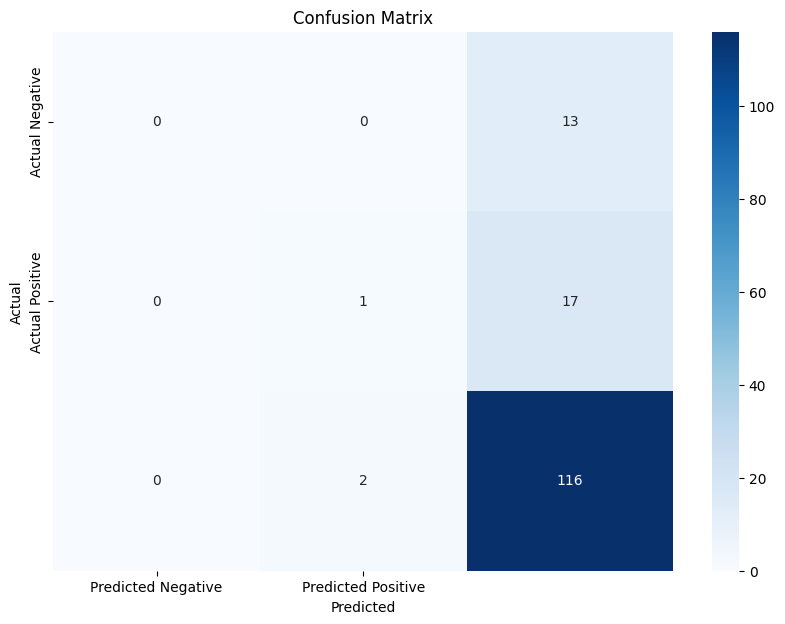

In [50]:

# evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
from wordcloud import WordCloud

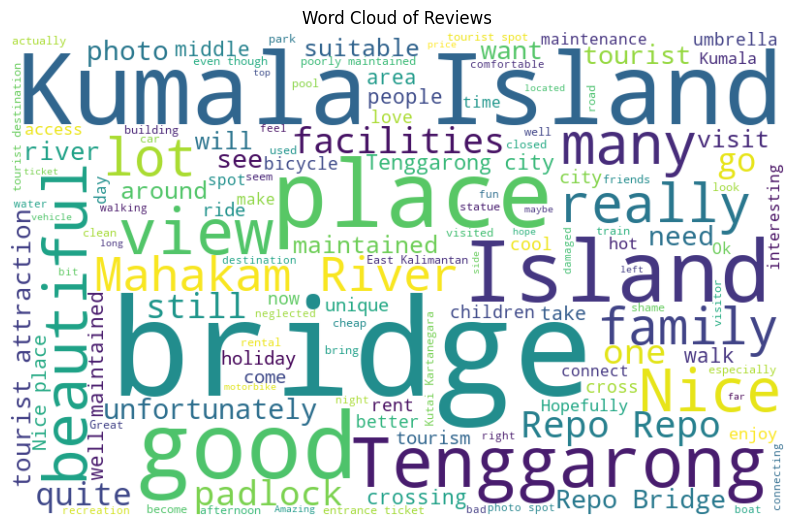

In [56]:
# path_to_datasets = "{}\\datasets".format(os.getcwd())
all_datasets = (pd.read_csv(f) for f in glob(os.path.join(path_to_datasets, "*.csv")))

# data = pd.read_csv('./datasets/dataset_jembatan_penyebrangan_pulau_kumala.csv')
data_origin = pd.concat(all_datasets, ignore_index=True)
data_origin['review'] = data_origin['review'].apply(remove_empty_review)
data_origin = data_origin.dropna(subset=['review'])

data_origin.drop(columns=['Unnamed: 0'], inplace=True)
data_origin.head()

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                # stopwords = None, 
                min_font_size = 10).generate(' '.join(data_origin['review']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [58]:
data

,name,review,contrib,humanized_timestamp,minires_images,stars.label,stars.value,bert_sentiment,sentiment,input_ids
0,Fachrul Rozie F,"[-0.18781453, 0.15712726, 0.2112856, -0.193930...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[7929, 1010, 1045, 2031, 2009, 0, 0, 0, 0, 0, ..."
1,Fachrul Rozie F,"[0.13413121, 0.13372079, 0.13411452, -0.041422...",Local Guide · 60 reviews · 65 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1996, 2173, 2003, 2204, 2005, 2635, 7760, 0, ..."
2,Teras,"[-0.603967, -0.19823349, -0.22585413, -0.22799...","Local Guide · 595 reviews · 3,079 photos",4 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[1037, 4310, 1998, 5875, 2479, 2284, 1999, 199..."
3,baim Journey,"[-0.7103056, 0.103414916, -0.11037938, -0.3888...",Local Guide · 99 reviews · 401 photos,6 years ago,['https://lh5.googleusercontent.com/p/AF1QipMg...,5 stars,5,POSITIVE,positive,"[2028, 1997, 1996, 7538, 14345, 2006, 13970, 9..."
4,Gustian Garang,"[0.1241154, 0.29901516, -0.07769714, -0.609486...",4 reviews · 10 photos,a year ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6429, 1012, 1012, 1012, 2004, 1037, 2154, 481..."
...,...,...,...,...,...,...,...,...,...,...
577,Helwan Syarif,"[-0.25217485, 0.28436112, -0.23304015, 0.02823...",Local Guide · 43 reviews · 602 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[2702, 23033, 17583, 1010, 2264, 19924, 2386, ..."
609,Yasman ARDI,"[-0.19408038, 0.35415038, -0.14881994, -0.0064...",Local Guide · 904 reviews · 438 photos,6 years ago,[no_minires_images],5 stars,5,POSITIVE,positive,"[6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
638,Masyhurun Fiinaa,"[-0.1824706, 0.09156554, -0.0046171322, -0.716...",Local Guide · 103 reviews · 473 photos,2 years ago,NaN,2 stars,2,NEGATIVE,negative,"[1996, 2173, 2003, 2025, 2092, 5224, 1012, 204..."
639,Irfan Yourdani,"[0.15377611, 0.07758195, 0.21679603, -0.591013...","Local Guide · 819 reviews · 3,236 photos",8 years ago,NaN,4 stars,4,NEGATIVE,positive,"[1996, 3578, 2003, 2204, 2005, 2336, 1005, 105..."


C:\Users\busin\AppData\Local\Temp\ipykernel_5356\1726810080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


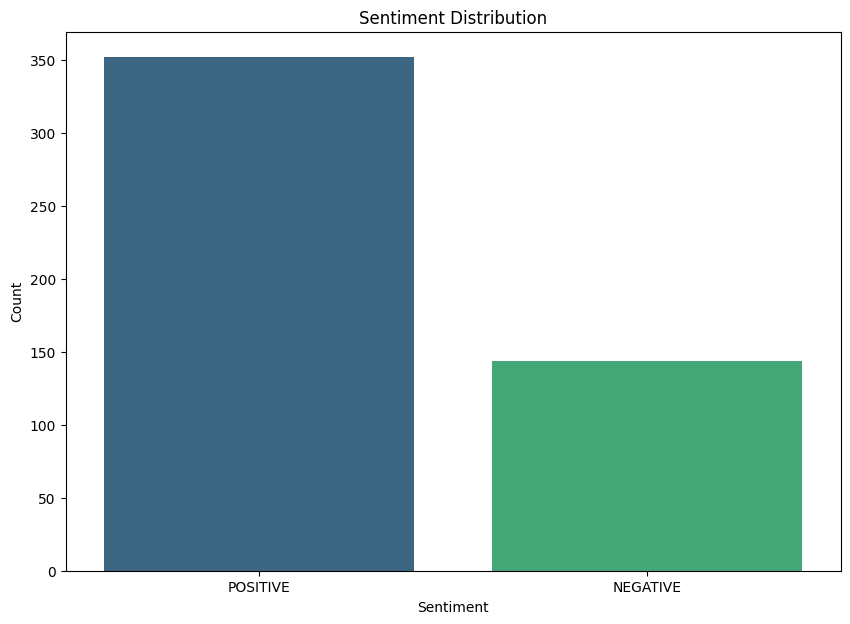

In [62]:
sentiment_counts = data['bert_sentiment'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [47]:
# convert the BERT features to a list of arrays
features = np.array(data['review'].tolist())

# apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], train_size=0.7, random_state=42)

# Apply chi-square feature selection to select the top 1000 features
# select the top K features (you can adjust k as needed)
k = 500 # example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
x_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# train a naive bayes classifier on the selected features
clf = GaussianNB()
clf.fit(x_train_kbest, y_train)

#  make predictions on the testing data
y_pred = clf.predict(X_test_kbest)

# evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.16      0.25      0.19        12
    positive       0.83      0.72      0.77        83

    accuracy                           0.64        99
   macro avg       0.33      0.32      0.32        99
weighted avg       0.72      0.64      0.67        99



In [24]:
features = np.array(data['review'].tolist())

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['sentiment'], test_size=0.3, random_state=42)

k_values = [50, 100, 200, 300, 400, 500]

best_k = 0
best_score = 0

for k in k_values:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_kbest = chi2_selector.fit_transform(X_train, y_train)

    clf = BernoulliNB()

    scores = cross_val_score(clf, X_train_kbest, y_train, cv=5)
    mean_score = scores.mean()

    print(f'K: {k}, Cross-validation score: {mean_score}')

    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print(f'Best K: {best_k}')
print(f'Best cross-validation score: {best_score}')

chi2_selector = SelectKBest(chi2, k=best_k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

clf = BernoulliNB()
clf.fit(X_train_kbest, y_train)

y_pred = clf.predict(X_test_kbest)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

K: 50, Cross-validation score: 0.8040165631469979
K: 100, Cross-validation score: 0.8040165631469979
K: 200, Cross-validation score: 0.8040579710144928
K: 300, Cross-validation score: 0.7983022774327122
K: 400, Cross-validation score: 0.8069151138716357
K: 500, Cross-validation score: 0.7982608695652174
Best K: 400
Best cross-validation score: 0.8069151138716357
Accuracy: 0.785234899328859
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.33      0.06      0.10        18
    positive       0.79      0.98      0.88       118

    accuracy                           0.79       149
   macro avg       0.38      0.35      0.32       149
weighted avg       0.67      0.79      0.71       149



d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\suarasiy\skripsi\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from sklearn.cluster import KMeans
# import numpy as np

# features = np.array(data['bert_features'].to_list())




In [39]:
# import pandas as pd
# from transformers import BertTokenizer, BertModel
# import torch
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Assuming 'data' is your DataFrame
# Example: data = pd.read_csv('concatenated_data.csv')

# Fill empty values in the 'review' column with a placeholder text
# data['review'].fillna('empty', inplace=True)

# Load the BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# Function to extract features from a single review
# def extract_features(review: str):
#     # Tokenize the review
#     inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)

#     # Get the hidden states from the BERT model
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # The last hidden state is the output of the model
#     last_hidden_state = outputs.last_hidden_state

#     # Use the [CLS] token embedding as the sentence embedding
#     cls_embedding = last_hidden_state[:, 0, :].squeeze().numpy()

#     return cls_embedding

# Apply the feature extraction to the 'review' column
# data['bert_features'] = data['review'].apply(extract_features)

# Convert the BERT features to a list of arrays
# features = np.array(data['bert_features'].tolist())
features = np.array(data['review'].tolist())

# Apply Min-Max scaling to ensure all values are non-negative
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['bert_sentiment'], test_size=0.3, random_state=42)

# Apply Chi-Square feature selection on the training data
# Select the top k features (you can adjust k as needed)
k = 50  # Example value, adjust based on your dataset
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Train an SVM classifier on the selected features
clf = MultinomialNB()
clf.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_kbest)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7248322147651006
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.47      0.53      0.49        38
    POSITIVE       0.83      0.79      0.81       111

    accuracy                           0.72       149
   macro avg       0.65      0.66      0.65       149
weighted avg       0.74      0.72      0.73       149

